# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import ib_insync

print(ib_insync.__all__)

import helpers.hdbg as hdbg
import helpers.hprint as hprint
import helpers.hstring as hstring
import im.ib.data.extract.gateway.utils as imidegaut

['util', 'Event', 'SoftDollarTier', 'PriceIncrement', 'Execution', 'CommissionReport', 'BarList', 'BarDataList', 'RealTimeBarList', 'BarData', 'RealTimeBar', 'HistogramData', 'NewsProvider', 'DepthMktDataDescription', 'ScannerSubscription', 'ScanDataList', 'FundamentalRatios', 'ExecutionFilter', 'PnL', 'PnLSingle', 'AccountValue', 'TickData', 'TickByTickAllLast', 'TickByTickBidAsk', 'TickByTickMidPoint', 'HistoricalTick', 'HistoricalTickBidAsk', 'HistoricalTickLast', 'TickAttrib', 'TickAttribBidAsk', 'TickAttribLast', 'MktDepthData', 'DOMLevel', 'TradeLogEntry', 'FamilyCode', 'SmartComponent', 'PortfolioItem', 'Position', 'Fill', 'OptionComputation', 'OptionChain', 'Dividends', 'NewsArticle', 'HistoricalNews', 'NewsTick', 'NewsBulletin', 'ConnectionStats', 'Contract', 'Stock', 'Option', 'Future', 'ContFuture', 'Forex', 'Index', 'CFD', 'Commodity', 'Bond', 'FuturesOption', 'MutualFund', 'Warrant', 'Bag', 'TagValue', 'ComboLeg', 'DeltaNeutralContract', 'ContractDetails', 'ContractDescrip

/Users/saggese/src/...2/amp/core/explore.py:36: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tauton


# Connect

In [2]:
ib = imidegaut.ib_connect(client_id=32, is_notebook=True)

# Basic

In [10]:
# print(hprint.obj_to_str(ib, attr_mode="dir", callable_mode="all"))

In [11]:
ib.positions()

[]

In [12]:
[
    v
    for v in ib.accountValues()
    if v.tag == "NetLiquidationByCurrency" and v.currency == "BASE"
]

[AccountValue(account='DU3235841', tag='NetLiquidationByCurrency', value='1000013.20', currency='BASE', modelCode='')]

## Equity

In [13]:
# INTC
contract = ib_insync.Contract(conId=270639)
eq_contract = imidegaut.to_contract_details(ib, contract)

contract= (<class 'ib_insync.contract.Contract'>)
	Contract(conId=270639)
contract_details= (<class 'list'>)
	[ContractDetails(contract=Contract(secType='STK', conId=270639, symbol='INTC', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='INTC', tradingClass='NMS'), marketName='NMS', minTick=0.01, orderTypes='ACTIVETIM,AD,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASKET,BENCHPX,CASHQTY,COND,CONDORDER,DARKONLY,DARKPOLL,DAY,DEACT,DEACTDIS,DEACTEOD,DIS,GAT,GTC,GTD,GTT,HID,IBKRATS,ICE,IMB,IOC,LIT,LMT,LOC,MIDPX,MIT,MKT,MOC,MTL,NGCOMB,NODARK,NONALGO,OCA,OPG,OPGREROUT,PEGBENCH,POSTONLY,PREOPGRTH,PRICECHK,REL,RPI,RTH,SCALE,SCALEODD,SCALERST,SIZECHK,SMARTSTG,SNAPMID,SNAPMKT,SNAPREL,STP,STPLMT,SWEEP,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,WHATIF', validExchanges='SMART,AMEX,NYSE,CBOE,PHLX,ISE,CHX,ARCA,ISLAND,DRCTEDGE,BEX,BATS,EDGEA,CSFBALGO,JEFFALGO,BYX,IEX,EDGX,FOXRIVER,PEARL,NYSENAT,LTSE,MEMX,PSX', priceMagnifier=1, underConId=0, longName='INTEL CORP', contractMonth='', industry='Technol

In [14]:
contract = ib_insync.Stock("AMD", "SMART", "USD")
eq_contract = imidegaut.to_contract_details(ib, contract)

contract= (<class 'ib_insync.contract.Stock'>)
	Stock(symbol='AMD', exchange='SMART', currency='USD')
contract_details= (<class 'list'>)
	[ContractDetails(contract=Contract(secType='STK', conId=4391, symbol='AMD', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='AMD', tradingClass='NMS'), marketName='NMS', minTick=0.01, orderTypes='ACTIVETIM,AD,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASKET,BENCHPX,CASHQTY,COND,CONDORDER,DARKONLY,DARKPOLL,DAY,DEACT,DEACTDIS,DEACTEOD,DIS,GAT,GTC,GTD,GTT,HID,IBKRATS,ICE,IMB,IOC,LIT,LMT,LOC,MIDPX,MIT,MKT,MOC,MTL,NGCOMB,NODARK,NONALGO,OCA,OPG,OPGREROUT,PEGBENCH,POSTONLY,PREOPGRTH,PRICECHK,REL,RPI,RTH,SCALE,SCALEODD,SCALERST,SIZECHK,SMARTSTG,SNAPMID,SNAPMKT,SNAPREL,STP,STPLMT,SWEEP,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,WHATIF', validExchanges='SMART,AMEX,NYSE,CBOE,PHLX,ISE,CHX,ARCA,ISLAND,DRCTEDGE,BEX,BATS,EDGEA,CSFBALGO,JEFFALGO,BYX,IEX,EDGX,FOXRIVER,PEARL,NYSENAT,LTSE,MEMX,PSX', priceMagnifier=1, underConId=0, longName='ADVANCED MICRO DEVICES',

In [15]:
contract = ib_insync.Stock("INTC", "SMART", "USD", primaryExchange="NASDAQ")
eq_contract = imidegaut.to_contract_details(ib, contract)

contract= (<class 'ib_insync.contract.Stock'>)
	Stock(symbol='INTC', exchange='SMART', primaryExchange='NASDAQ', currency='USD')
contract_details= (<class 'list'>)
	[ContractDetails(contract=Contract(secType='STK', conId=270639, symbol='INTC', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='INTC', tradingClass='NMS'), marketName='NMS', minTick=0.01, orderTypes='ACTIVETIM,AD,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASKET,BENCHPX,CASHQTY,COND,CONDORDER,DARKONLY,DARKPOLL,DAY,DEACT,DEACTDIS,DEACTEOD,DIS,GAT,GTC,GTD,GTT,HID,IBKRATS,ICE,IMB,IOC,LIT,LMT,LOC,MIDPX,MIT,MKT,MOC,MTL,NGCOMB,NODARK,NONALGO,OCA,OPG,OPGREROUT,PEGBENCH,POSTONLY,PREOPGRTH,PRICECHK,REL,RPI,RTH,SCALE,SCALEODD,SCALERST,SIZECHK,SMARTSTG,SNAPMID,SNAPMKT,SNAPREL,STP,STPLMT,SWEEP,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,WHATIF', validExchanges='SMART,AMEX,NYSE,CBOE,PHLX,ISE,CHX,ARCA,ISLAND,DRCTEDGE,BEX,BATS,EDGEA,CSFBALGO,JEFFALGO,BYX,IEX,EDGX,FOXRIVER,PEARL,NYSENAT,LTSE,MEMX,PSX', priceMagnifier=1, underConId=0, lon

## Forex

In [16]:
contract = ib_insync.Forex("EURUSD")
forex_contract = imidegaut.to_contract_details(ib, contract)

contract= (<class 'ib_insync.contract.Forex'>)
	Forex('EURUSD', exchange='IDEALPRO')
contract_details= (<class 'list'>)
	[ContractDetails(contract=Contract(secType='CASH', conId=12087792, symbol='EUR', exchange='IDEALPRO', currency='USD', localSymbol='EUR.USD', tradingClass='EUR.USD'), marketName='EUR.USD', minTick=5e-05, orderTypes='ACTIVETIM,AD,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASKET,CASHQTY,COND,CONDORDER,DAY,DEACT,DEACTDIS,DEACTEOD,GAT,GTC,GTD,GTT,HID,IOC,LIT,LMT,MIT,MKT,NONALGO,OCA,REL,SCALE,SCALERST,STP,STPLMT,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,WHATIF', validExchanges='IDEALPRO', priceMagnifier=1, underConId=0, longName='European Monetary Union Euro', contractMonth='', industry='', category='', subcategory='', timeZoneId='US/Eastern', tradingHours='20210227:CLOSED;20210228:1715-20210301:1700;20210301:1715-20210302:1700;20210302:1715-20210303:1700;20210303:1715-20210304:1700;20210304:1715-20210305:1700', liquidHours='20210227:CLOSED;20210228:1715-20210301:1700;20210301:1715-20210302:

In [17]:
print(hstring.diff_strings(eq_contract, forex_contract))

aggGroup= 1						      |	aggGroup= 4
bondType= 							bondType= 
callable= False							callable= False
category= Semiconductors				      |	category= 
contract= Contract(secType='STK', conId=270639, symbol='INTC' |	contract= Contract(secType='CASH', conId=12087792, symbol='EU
contractMonth= 							contractMonth= 
convertible= False						convertible= False
coupon= 0							coupon= 0
couponType= 							couponType= 
cusip= 								cusip= 
descAppend= 							descAppend= 
evMultiplier= 0							evMultiplier= 0
evRule= 							evRule= 
industry= Technology					      |	industry= 
issueDate= 							issueDate= 
lastTradeTime= 							lastTradeTime= 
liquidHours= 20210227:CLOSED;20210228:CLOSED;20210301:0930-20 |	liquidHours= 20210227:CLOSED;20210228:1715-20210301:1700;2021
longName= INTEL CORP					      |	longName= European Monetary Union Euro
marketName= NMS						      |	marketName= EUR.USD
marketRuleIds= 26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,2 |	marketRuleIds= 239
maturity= 							maturity=

## CFD (contract for difference)

In [18]:
contract = ib_insync.CFD("IBUS30")
cfd_contract = imidegaut.to_contract_details(ib, contract)

contract= (<class 'ib_insync.contract.CFD'>)
	CFD(symbol='IBUS30')
contract_details= (<class 'list'>)
	[ContractDetails(contract=Contract(secType='CFD', conId=111767879, symbol='IBUS30', exchange='SMART', currency='USD', localSymbol='IBUS30', tradingClass='IBUS30'), marketName='IBUS30', minTick=0.01, orderTypes='ACTIVETIM,AD,ADJUST,ALERT,ALLOC,AVGCOST,BASKET,COND,CONDORDER,DAY,DEACT,DEACTDIS,DEACTEOD,GAT,GTC,GTD,GTT,HID,LIT,LMT,MIT,MKT,MTL,NGCOMB,NONALGO,OCA,OPG,PEGBENCH,SCALE,SCALERST,SNAPMID,SNAPMKT,SNAPREL,STP,STPLMT,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,USEMID,USESTKMD,WHATIF', validExchanges='SMART', priceMagnifier=1, underConId=111746713, longName='US 30', contractMonth='', industry='', category='', subcategory='', timeZoneId='GB-Eire', tradingHours='20210227:CLOSED;20210228:CLOSED;20210301:0800-20210301:2100;20210302:0800-20210302:2100;20210303:0800-20210303:2100;20210304:0800-20210304:2100', liquidHours='20210227:CLOSED;20210228:CLOSED;20210301:0800-20210301:2100;20210302:0800-20210

In [19]:
print(hstring.diff_strings(eq_contract, cfd_contract))

aggGroup= 1						      |	aggGroup= 15
bondType= 							bondType= 
callable= False							callable= False
category= Semiconductors				      |	category= 
contract= Contract(secType='STK', conId=270639, symbol='INTC' |	contract= Contract(secType='CFD', conId=111767879, symbol='IB
contractMonth= 							contractMonth= 
convertible= False						convertible= False
coupon= 0							coupon= 0
couponType= 							couponType= 
cusip= 								cusip= 
descAppend= 							descAppend= 
evMultiplier= 0							evMultiplier= 0
evRule= 							evRule= 
industry= Technology					      |	industry= 
issueDate= 							issueDate= 
lastTradeTime= 							lastTradeTime= 
liquidHours= 20210227:CLOSED;20210228:CLOSED;20210301:0930-20 |	liquidHours= 20210227:CLOSED;20210228:CLOSED;20210301:0800-20
longName= INTEL CORP					      |	longName= US 30
marketName= NMS						      |	marketName= IBUS30
marketRuleIds= 26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,2 |	marketRuleIds= 218
maturity= 							maturity= 
mdSizeMultiplier= 100

## Futures

In [20]:
contract = ib_insync.Future("ES", "202109", "GLOBEX")
fut_contract = imidegaut.to_contract_details(ib, contract)

contract= (<class 'ib_insync.contract.Future'>)
	Future(symbol='ES', lastTradeDateOrContractMonth='202109', exchange='GLOBEX')
contract_details= (<class 'list'>)
	[ContractDetails(contract=Contract(secType='FUT', conId=428520022, symbol='ES', lastTradeDateOrContractMonth='20210917', multiplier='50', exchange='GLOBEX', currency='USD', localSymbol='ESU1', tradingClass='ES'), marketName='ES', minTick=0.25, orderTypes='ACTIVETIM,AD,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASKET,BENCHPX,COND,CONDORDER,DAY,DEACT,DEACTDIS,DEACTEOD,GAT,GTC,GTD,GTT,HID,ICE,IOC,LIT,LMT,LTH,MIT,MKT,MTL,NGCOMB,NONALGO,OCA,PEGBENCH,SCALE,SCALERST,SNAPMID,SNAPMKT,SNAPREL,STP,STPLMT,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,WHATIF', validExchanges='GLOBEX,QBALGO', priceMagnifier=1, underConId=11004968, longName='E-mini S&P 500', contractMonth='202109', industry='', category='', subcategory='', timeZoneId='US/Central', tradingHours='20210227:CLOSED;20210228:1700-20210301:1515;20210301:1530-20210301:1600;20210301:1700-20210302:1515;202

In [21]:
print(hstring.diff_strings(eq_contract, fut_contract, "eq", "fut"))

# eq							      |	# fut
aggGroup= 1						      |	aggGroup= 2147483647
bondType= 							bondType= 
callable= False							callable= False
category= Semiconductors				      |	category= 
contract= Contract(secType='STK', conId=270639, symbol='INTC' |	contract= Contract(secType='FUT', conId=428520022, symbol='ES
contractMonth= 						      |	contractMonth= 202109
convertible= False						convertible= False
coupon= 0							coupon= 0
couponType= 							couponType= 
cusip= 								cusip= 
descAppend= 							descAppend= 
evMultiplier= 0							evMultiplier= 0
evRule= 							evRule= 
industry= Technology					      |	industry= 
issueDate= 							issueDate= 
lastTradeTime= 						      |	lastTradeTime= 08:30
liquidHours= 20210227:CLOSED;20210228:CLOSED;20210301:0930-20 |	liquidHours= 20210227:CLOSED;20210228:CLOSED;20210301:0830-20
longName= INTEL CORP					      |	longName= E-mini S&P 500
marketName= NMS						      |	marketName= ES
marketRuleIds= 26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,2 |	marke

## Continuous Futures

In [25]:
# contract = ib_insync.ContFuture('ES', '202109', 'GLOBEX')
# fut_contract = imidegaut.to_contract_details(ib, contract)

## Option

In [ ]:
contract = ib_insync.Option("SPY", "202107", 240, "C", "SMART")
opt_contract = imidegaut.to_contract_details(ib, contract)

## Bond

In [ ]:
contract = Bond(secIdType="ISIN", secId="US03076KAA60")
bond_contract = imidegaut.to_contract_details(ib, contract)

# Contract details

## Equities

In [26]:
# Look for Stocks matching AMD.
asset = ib_insync.Stock("AMD")
cds = ib.reqContractDetails(asset)
print("num contracts=", len(cds))
print(cds[0])

num contracts= 38
ContractDetails(contract=Contract(secType='STK', conId=4391, symbol='AMD', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='AMD', tradingClass='NMS'), marketName='NMS', minTick=0.01, orderTypes='ACTIVETIM,AD,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASKET,BENCHPX,CASHQTY,COND,CONDORDER,DARKONLY,DARKPOLL,DAY,DEACT,DEACTDIS,DEACTEOD,DIS,GAT,GTC,GTD,GTT,HID,IBKRATS,ICE,IMB,IOC,LIT,LMT,LOC,MIDPX,MIT,MKT,MOC,MTL,NGCOMB,NODARK,NONALGO,OCA,OPG,OPGREROUT,PEGBENCH,POSTONLY,PREOPGRTH,PRICECHK,REL,RPI,RTH,SCALE,SCALEODD,SCALERST,SIZECHK,SMARTSTG,SNAPMID,SNAPMKT,SNAPREL,STP,STPLMT,SWEEP,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,WHATIF', validExchanges='SMART,AMEX,NYSE,CBOE,PHLX,ISE,CHX,ARCA,ISLAND,DRCTEDGE,BEX,BATS,EDGEA,CSFBALGO,JEFFALGO,BYX,IEX,EDGX,FOXRIVER,PEARL,NYSENAT,LTSE,MEMX,PSX', priceMagnifier=1, underConId=0, longName='ADVANCED MICRO DEVICES', contractMonth='', industry='Technology', category='Semiconductors', subcategory='Electronic Compo-Semicon', timeZoneId='

In [27]:
contracts = [cd.contract for cd in cds]
print(contracts[0])

ib_insync.util.df(contracts)

Contract(secType='STK', conId=4391, symbol='AMD', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='AMD', tradingClass='NMS')


,secType,conId,symbol,lastTradeDateOrContractMonth,strike,right,multiplier,exchange,primaryExchange,currency,localSymbol,tradingClass,includeExpired,secIdType,secId,comboLegsDescrip,comboLegs,deltaNeutralContract
0,STK,4391,AMD,,0.0,,,SMART,NASDAQ,USD,AMD,NMS,False,,,,[],None
1,STK,4391,AMD,,0.0,,,AMEX,NASDAQ,USD,AMD,NMS,False,,,,[],None
2,STK,32596680,AMD,,0.0,,,SMART,IBIS,EUR,AMD,XETRA,False,,,,[],None
3,STK,4391,AMD,,0.0,,,NYSE,NASDAQ,USD,AMD,NMS,False,,,,[],None
4,STK,4391,AMD,,0.0,,,CBOE,NASDAQ,USD,AMD,NMS,False,,,,[],None
5,STK,4391,AMD,,0.0,,,PHLX,NASDAQ,USD,AMD,NMS,False,,,,[],None
6,STK,4391,AMD,,0.0,,,ISE,NASDAQ,USD,AMD,NMS,False,,,,[],None
7,STK,4391,AMD,,0.0,,,CHX,NASDAQ,USD,AMD,NMS,False,,,,[],None
8,STK,4391,AMD,,0.0,,,ARCA,NASDAQ,USD,AMD,NMS,False,,,,[],None
9,STK,4391,AMD,,0.0,,,ISLAND,NASDAQ,USD,AMD,NMS,False,,,,[],None


In [ ]:
# Show that there is a single AMD in US.
asset = ib_insync.Stock("AMD", "SMART", "USD")
print("asset=", asset)
cds = ib.reqContractDetails(asset)
print("num contracts=", len(cds))
hdbg.dassert_eq(len(cds), 1)
print(cds[0])

In [ ]:
ib.qualifyContracts(asset)

In [ ]:
# Request stocks that match a pattern.
matches = ib.reqMatchingSymbols("intc")
contracts = [m.contract for m in matches]
ib_insync.util.df(contracts)

## Futures

In [31]:
# Look for ES.

asset = ib_insync.Future("ES", includeExpired=True)
imidegaut.get_contract_details(ib, asset)

num contracts= 26
Contract(secType='FUT', conId=299552802, symbol='ES', lastTradeDateOrContractMonth='20190315', multiplier='50', exchange='GLOBEX', currency='USD', localSymbol='ESH9', tradingClass='ES')
exchange= ['GLOBEX' 'QBALGO']


,conId,lastTradeDateOrContractMonth,localSymbol
0,299552802,20190315,ESH9
2,310629209,20190621,ESM9
4,321454763,20190920,ESU9
6,334144679,20191220,ESZ9
8,346577697,20200320,ESH0
10,357283364,20200619,ESM0
13,371749798,20200918,ESU0
14,383974339,20201218,ESZ0
16,396336017,20210319,ESH1
18,412889032,20210618,ESM1


In [39]:
cds = ib.reqContractDetails(asset)

contracts = [cd.contract for cd in cds]

ib_insync.util.df(contracts)

,secType,conId,symbol,lastTradeDateOrContractMonth,strike,right,multiplier,exchange,primaryExchange,currency,localSymbol,tradingClass,includeExpired,secIdType,secId,comboLegsDescrip,comboLegs,deltaNeutralContract
0,FUT,299552802,ES,20190315,0.0,,50,GLOBEX,,USD,ESH9,ES,False,,,,[],None
1,FUT,299552802,ES,20190315,0.0,,50,QBALGO,,USD,ESH9,ES,False,,,,[],None
2,FUT,310629209,ES,20190621,0.0,,50,GLOBEX,,USD,ESM9,ES,False,,,,[],None
3,FUT,310629209,ES,20190621,0.0,,50,QBALGO,,USD,ESM9,ES,False,,,,[],None
4,FUT,321454763,ES,20190920,0.0,,50,GLOBEX,,USD,ESU9,ES,False,,,,[],None
5,FUT,321454763,ES,20190920,0.0,,50,QBALGO,,USD,ESU9,ES,False,,,,[],None
6,FUT,334144679,ES,20191220,0.0,,50,GLOBEX,,USD,ESZ9,ES,False,,,,[],None
7,FUT,334144679,ES,20191220,0.0,,50,QBALGO,,USD,ESZ9,ES,False,,,,[],None
8,FUT,346577697,ES,20200320,0.0,,50,GLOBEX,,USD,ESH0,ES,False,,,,[],None
9,FUT,346577697,ES,20200320,0.0,,50,QBALGO,,USD,ESH0,ES,False,,,,[],None


## Cont futures

In [ ]:
asset = ib_insync.ContFuture("ES", "Globex", "USD")
imidegaut.get_contract_details(ib, asset)

In [ ]:
imidegaut.get_end_timestamp(ib, contract, "TRADES", useRTH=True)

# Option chain

In [ ]:
# Options on SPX next 3

In [ ]:
spx = ib_insync.Index("SPX", "CBOE")
print("type=%s %s" % (type(spx), spx))

ib.qualifyContracts(spx)

In [ ]:
# Use delayed data.
ib.reqMarketDataType(4)
tickers = ib.reqTickers(spx)
assert len(tickers) == 1
ticker = tickers[0]

print(hprint.type_obj_to_str(ticker))

In [ ]:
spx_value = ticker.marketPrice()
spx_value

In [ ]:
# TODO: finish

# Historical data

In [10]:
# 1 = Live
# 2 = Frozen
# 3 = Delayed
# 4 = Delayed frozen
ib.reqMarketDataType(4)

if False:
    contract = ib_insync.Stock("TSLA", "SMART", "USD")
    whatToShow = "TRADES"
elif False:
    contract = ib_insync.Future("ES", "202109", "GLOBEX")
    whatToShow = "TRADES"
elif False:
    contract = ib_insync.ContFuture("ES", "GLOBEX", "USD")
    whatToShow = "TRADES"
else:
    contract = ib_insync.Forex("EURUSD")
    whatToShow = "MIDPOINT"

if False:
    durationStr = "1 Y"
    barSizeSetting = "1 day"
    # barSizeSetting='1 hour'
else:
    durationStr = "1 D"
    barSizeSetting = "1 hour"

print("contract=", contract)
print("whatToShow=", whatToShow)
print("durationStr=", durationStr)
print("barSizeSetting=", barSizeSetting)

# Get the datetime of earliest available historical data for the contract.
ts = ib.reqHeadTimeStamp(contract, whatToShow=whatToShow, useRTH=True)
print("ts=", ts)
bars = ib.reqHistoricalData(
    contract,
    endDateTime="",
    durationStr=durationStr,
    barSizeSetting=barSizeSetting,
    whatToShow=whatToShow,
    useRTH=True,
    formatDate=1,
)
print("len(bars)=", len(bars))
print(ib_insync.util.df(bars))

contract= Forex('EURUSD', exchange='IDEALPRO')
whatToShow= MIDPOINT
durationStr= 1 D
barSizeSetting= 1 hour
ts= 2005-03-09 04:30:00
len(bars)= 1
                 date      open      high      low     close  volume  average  \
0 2021-03-04 17:15:00  1.197375  1.197465  1.19715  1.197375      -1     -1.0   

   barCount  
0        -1  


In [8]:
# icontract = ib_insync.Stock('TSLA', 'SMART', 'USD')
contract = ib_insync.Forex("EURUSD")

# Get the datetime of earliest available historical data for the contract.
ib.reqHeadTimeStamp(contract, whatToShow="TRADES", useRTH=True)

Error 162, reqId 6: Historical Market Data Service error message:No historical market data for EUR/CASH@IDEALPRO Last 0, contract: Forex('EURUSD', exchange='IDEALPRO')


RequestError: API error: 162: Historical Market Data Service error message:No historical market data for EUR/CASH@IDEALPRO Last 0

In [ ]:
print(contract)
ib.reqMarketDataType(4)
bars = ib.reqHistoricalData(
    contract,
    endDateTime="20200101 01:01:01",
    durationStr="60 D",
    barSizeSetting="1 hour",
    whatToShow="TRADES",
    useRTH=True,
    formatDate=1,
)

In [ ]:
print(bars[0])
df = util.df(bars)

display(df.head())
display(df.tail())

## Historical data with RT updates

In [11]:
ib.reqMarketDataType(1)
contract = ib_insync.Forex("EURUSD")

bars = ib.reqHistoricalData(
    contract,
    endDateTime="",
    durationStr="900 S",
    barSizeSetting="10 secs",
    whatToShow="MIDPOINT",
    useRTH=True,
    formatDate=1,
    keepUpToDate=True,
)

print(bars[-1])

import matplotlib.pyplot as plt

BarData(date=datetime.datetime(2021, 3, 4, 17, 51, 10), open=1.197375, high=1.197375, low=1.197375, close=1.197375, volume=-1, average=-1.0, barCount=-1)


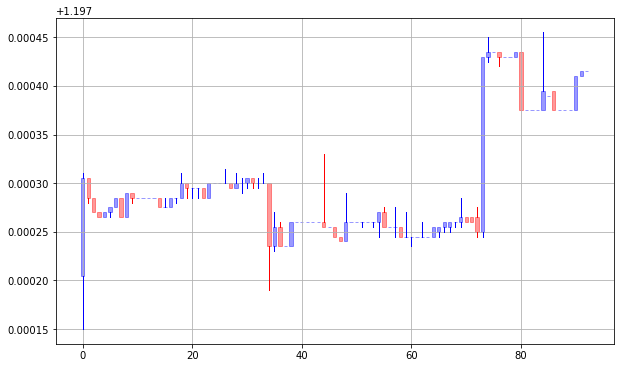

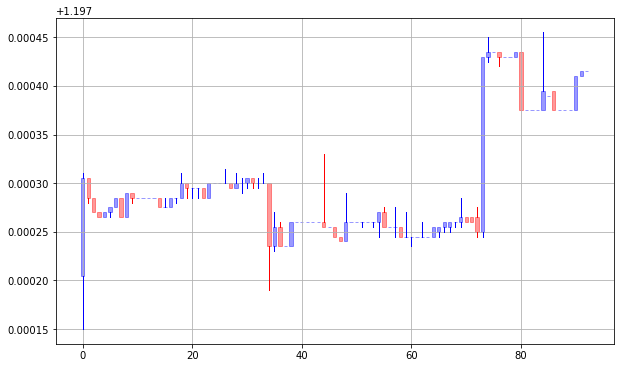

Error 162, reqId 11: Historical Market Data Service error message:API historical data query cancelled: 11


In [12]:
from IPython.display import clear_output, display


def onBarUpdate(bars, hasNewBar):
    plt.close()
    plot = ib_insync.util.barplot(bars)
    clear_output(wait=True)
    display(plot)


bars.updateEvent += onBarUpdate

ib.sleep(10)
ib.cancelHistoricalData(bars)

## Realtime bars

In [13]:
def onBarUpdate(bars, hasNewBar):
    print(bars[-1])

In [14]:
bars = ib.reqRealTimeBars(contract, 5, "MIDPOINT", False)
bars.updateEvent += onBarUpdate

RealTimeBar(time=datetime.datetime(2021, 3, 4, 22, 51, 35, tzinfo=datetime.timezone.utc), endTime=-1, open_=1.197415, high=1.197415, low=1.197415, close=1.197415, volume=-1, wap=-1.0, count=-1)
RealTimeBar(time=datetime.datetime(2021, 3, 4, 22, 51, 40, tzinfo=datetime.timezone.utc), endTime=-1, open_=1.197415, high=1.197415, low=1.197415, close=1.197415, volume=-1, wap=-1.0, count=-1)
RealTimeBar(time=datetime.datetime(2021, 3, 4, 22, 51, 45, tzinfo=datetime.timezone.utc), endTime=-1, open_=1.197415, high=1.197415, low=1.19741, close=1.19741, volume=-1, wap=-1.0, count=-1)
RealTimeBar(time=datetime.datetime(2021, 3, 4, 22, 51, 50, tzinfo=datetime.timezone.utc), endTime=-1, open_=1.19741, high=1.19741, low=1.19741, close=1.19741, volume=-1, wap=-1.0, count=-1)
RealTimeBar(time=datetime.datetime(2021, 3, 4, 22, 51, 55, tzinfo=datetime.timezone.utc), endTime=-1, open_=1.19741, high=1.19741, low=1.19741, close=1.19741, volume=-1, wap=-1.0, count=-1)
RealTimeBar(time=datetime.datetime(2021,

In [15]:
ib.sleep(10)
ib.cancelRealTimeBars(bars)

RealTimeBar(time=datetime.datetime(2021, 3, 4, 22, 52, 10, tzinfo=datetime.timezone.utc), endTime=-1, open_=1.19741, high=1.19741, low=1.19741, close=1.19741, volume=-1, wap=-1.0, count=-1)
RealTimeBar(time=datetime.datetime(2021, 3, 4, 22, 52, 15, tzinfo=datetime.timezone.utc), endTime=-1, open_=1.19741, high=1.197415, low=1.19741, close=1.197415, volume=-1, wap=-1.0, count=-1)


Error 1100, reqId -1: Connectivity between IB and Trader Workstation has been lost.
Error 1100, reqId -1: Connectivity between IB and Trader Workstation has been lost.


# Tick data

## Streaming tick data

In [ ]:
contracts = ("EURUSD", "USDJPY", "GBPUSD", "USDCHF", "USDCAD", "AUDUSD")
contracts = [ib_insync.Forex(p) for p in contracts]
ib.qualifyContracts(*contracts)

In [ ]:
# reqMktData: subscribe to tick data or request a snapshot.
# https://interactivebrokers.github.io/tws-api/md_request.html

for contract in contracts:
    # https://ib-insync.readthedocs.io/api.html#ib_insync.ib.IB.reqMktData
    genericTickList = ""
    # Subscribe a stream of real time.
    snapshot = False
    # Request NBBO snapshot.
    regulatory_snapshot = False
    ib.reqMktData(contract, genericTickList, snapshot, regulatory_snapshot)

In [ ]:
eurusd = contracts[1]
ticker = ib.ticker(eurusd)
print(ticker)
print(ticker.midpoint())

In [ ]:
# ticker.marketPrice()
ticker.midpoint()

import pandas as pd

In [ ]:
from IPython.display import clear_output, display

df = pd.DataFrame(
    index=[c.pair() for c in contracts],
    columns=["bidSize", "bid", "ask", "askSize", "high", "low", "close"],
)


def onPendingTickers(tickers):
    for t in tickers:
        df.loc[t.contract.pair()] = (
            t.bidSize,
            t.bid,
            t.ask,
            t.askSize,
            t.high,
            t.low,
            t.close,
        )
        clear_output(wait=True)
    display(df)


ib.pendingTickersEvent += onPendingTickers
ib.sleep(10)
ib.pendingTickersEvent -= onPendingTickers
print("DONE")

In [ ]:
# Stop the update.
for contract in contracts:
    ib.cancelMktData(contract)

## Tick by tick data

In [ ]:
# re
# https://interactivebrokers.github.io/tws-api/tick_data.html

In [ ]:
ticker = ib.reqTickByTickData(eurusd, "BidAsk")
ib.sleep(2)
print(ticker)

In [ ]:
ticker = ib.reqTickByTickData(eurusd, "BidAsk")
ib.sleep(2)
print(ticker)

In [ ]:
ib.cancelTickByTickData(ticker.contract, "BidAsk")

## Historical tick data

In [ ]:
# reqHistoricalTicks(contract, startDateTime, endDateTime,
#    numberOfTicks, whatToShow, useRth, ignoreSize=False, miscOptions=[]
# Request historical ticks. The time resolution of the ticks is one second.
# This method is blocking.
# https://interactivebrokers.github.io/tws-api/historical_time_and_sales.html

In [ ]:
import datetime

start = ""
end = datetime.datetime.now()
print(start, end)
number_of_ticks = 1000
what_to_show = "BID_ASK"
useRTH = False
ticks = ib.reqHistoricalTicks(
    eurusd, start, end, number_of_ticks, what_to_show, useRTH
)

print(len(ticks))
df = ib_insync.util.df(ticks)
df.drop(columns="tickAttribBidAsk", inplace=True)
# df.index = [t.time for t in ticks]

df.head(5)

In [ ]:
print(str(ticks)[:1000])
print(ticks[0].time, ticks[-1].time)

# Market depth (order book)

## Get exchange info

In [ ]:
l = ib.reqMktDepthExchanges()
print("num exchanges with market depth=", len(l))
print("\n".join(map(str, l[:5])))

In [ ]:
df = ib_insync.util.df(l)
display(df.head(5))
print("secType=", df["secType"].unique())
df.sort_values("secType")
print(len(df))

df_fut = df[df["secType"] == "FUT"].sort_values("exchange")
print(len(df_fut))
display(df_fut)

## Get the book

In [ ]:
contract = ib_insync.Forex("EURUSD")
ib.qualifyContracts(contract)
ticker = ib.reqMktDepth(contract)

In [ ]:
ticker

import pandas as pd

In [ ]:
from IPython.display import clear_output, display

df = pd.DataFrame(
    index=range(5), columns="bidSize bidPrice askPrice askSize".split()
)


def onTickerUpdate(ticker):
    bids = ticker.domBids
    for i in range(5):
        df.iloc[i, 0] = bids[i].size if i < len(bids) else 0
        df.iloc[i, 1] = bids[i].price if i < len(bids) else 0
    asks = ticker.domAsks
    for i in range(5):
        df.iloc[i, 2] = asks[i].price if i < len(asks) else 0
        df.iloc[i, 3] = asks[i].size if i < len(asks) else 0
    clear_output(wait=True)
    display(df)


ticker.updateEvent += onTickerUpdate

ib_insync.IB.sleep(15)

In [ ]:
ib.cancelMktDepth(contract)

In [23]:
assert 0

AssertionError: 

# Ordering

## Account info

In [ ]:
# List of positions for a given account.
print("positions=\n\t", "\n\t".join(map(str, ib.positions())))

## List of all orders in current session.
print("orders=", ib.orders())

## List of trades in current session.
print("trades=", ib.trades())

## Order

In [ ]:
if True:
    contract = ib_insync.Forex("EURUSD")
    ib.qualifyContracts(contract)
    print("contract=", contract)
    #
    total_quantity = 2000
    # total_quantity = 3900
    limit_price = 1.1
else:
    contract = ib_insync.Future("ES", "202109", "GLOBEX")
    ib.qualifyContracts(contract)
    print("contract=", contract)
    #
    total_quantity = 2000
    limit_price = 1.1

In [ ]:
%%time
total_quantity = 3900
# limit_price = 1.1
limit_price = 100
order = ib_insync.LimitOrder("BUY", total_quantity, limit_price)
print("order=", order)

In [ ]:
def print_trade(trade):
    # print("trade=", trade)
    print("trade.contract=", trade.contract)
    print("trade.order=", trade.order)
    print("trade.orderStatus=", trade.orderStatus)
    print("log=\n\t%s" % "\n\t".join(map(str, trade.log)))

In [ ]:
trade = ib.placeOrder(contract, order)

In [ ]:
print_trade(trade)

In [ ]:
# The trade is in the trades.
ib.trades()

In [ ]:
ib.orders()

## Order can't be filled.

In [ ]:
total_quantity = 2000
limit_price = 1.1
order = ib_insync.LimitOrder("SELL", total_quantity, limit_price)
print("order=", order)

In [ ]:
# Create a buy order with an irrealistic limit price (too low).
print("contract=", contract)
total_quantity = 2000
price = 0.05
order = ib_insync.LimitOrder("BUY", total_quantity, price)
# placeOrder is not blocking.
trade = ib.placeOrder(contract, order)

print_trade(trade)

In [ ]:
# print(ib.openTrades())
print(trade.orderStatus.status)

In [ ]:
print(trade.orderStatus.status)
ib.cancelOrder(order)
print(trade.orderStatus.status)

In [ ]:
trade.log

In [ ]:
%%time
order = ib_insync.MarketOrder("BUY", 100)

trade = ib.placeOrder(contract, order)
while not trade.isDone():
    print("status=", trade.orderStatus.status)
    ib.waitOnUpdate()

In [ ]:
ib.positions()

In [ ]:
tot_commission = sum(fill.commissionReport.commission for fill in ib.fills())
print(tot_commission)

In [ ]:
# See commission and margin impact without sending order.
order = ib_insync.MarketOrder("SELL", 20000)
order_state = ib.whatIfOrder(contract, order)
print(type(order_state))
print(order_state)

# str(order_state)

In [ ]:
order_state.dict()

# News articles

In [ ]:
newsProviders = ib.reqNewsProviders()
print("newsProviders=", newsProviders)
codes = "+".join(np.code for np in newsProviders)

#
contract = ib_insync.Stock("AMD", "SMART", "USD")
# contract = ib_insync.Future('ES')
ib.qualifyContracts(contract)

# reqHistoricalNews(conId, providerCodes, startDateTime, endDateTime, totalResults, historicalNewsOptions=None)
startDateTime = ""
endDateTime = ""
totalResults = 10
headlines = ib.reqHistoricalNews(
    contract.conId, codes, startDateTime, endDateTime, totalResults
)

print("\nlen(headlines)=", len(headlines))
latest = headlines[0]
print("\nheadline=", latest)

# Retrieve the article.
article = ib.reqNewsArticle(latest.providerCode, latest.articleId)
print("\narticle=", article)

# Scanner

In [ ]:
# TODO

# Code recipes

## Fetching consecutive data

In [ ]:
# 1 = Live
# 2 = Frozen
# 3 = Delayed
# 4 = Delayed frozen
ib.reqMarketDataType(4)

if False:
    durationStr = "1 Y"
    barSizeSetting = "1 day"
    # barSizeSetting='1 hour'
else:
    durationStr = "1 D"
    barSizeSetting = "1 hour"

if False:
    contract = ib_insync.Stock("TSLA", "SMART", "USD")
    whatToShow = "TRADES"
elif True:
    contract = ib_insync.Future("ES", "202109", "GLOBEX")
    whatToShow = "TRADES"
else:
    contract = ib_insync.Forex("EURUSD")
    whatToShow = "MIDPOINT"

print("contract=", contract)
print("whatToShow=", whatToShow)
print("durationStr=", durationStr)
print("barSizeSetting=", barSizeSetting)

# Get the datetime of earliest available historical data for the contract.
ts = ib.reqHeadTimeStamp(contract, whatToShow=whatToShow, useRTH=True)
print("ts=", ts)
bars = ib.reqHistoricalData(
    contract,
    endDateTime="",
    durationStr=durationStr,
    barSizeSetting=barSizeSetting,
    whatToShow=whatToShow,
    useRTH=True,
    formatDate=1,
)
print("len(bars)=", len(bars))

In [ ]:
# contract = Stock('TSLA', 'SMART', 'USD')
contract = ib_insync.Forex("EURUSD")
whatToShow = "MIDPOINT"
ts = ib.reqHeadTimeStamp(contract, whatToShow=whatToShow, useRTH=True)
print(ts)
# assert 0

num_iter = 0
max_iter = 5
dt = ""
barsList = []
while True:
    bars = ib.reqHistoricalData(
        contract,
        endDateTime=dt,
        durationStr="10 D",
        barSizeSetting="1 min",
        whatToShow="MIDPOINT",
        useRTH=False,
        formatDate=1,
    )
    if not bars:
        break
    barsList.append(bars)
    dt = bars[0].date
    print(dt, len(bars))
    num_iter += 1
    if num_iter > max_iter:
        break

# save to CSV file
allBars = [b for bars in reversed(barsList) for b in bars]
df = util.df(allBars)
# df.to_csv(contract.symbol + '.csv')